In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("car_purchasing.csv", encoding="ISO-8859-1")

# Preview the dataset and list the columns
print("Dataset Preview:")
print(df.head())
print("\nColumns in Dataset:", df.columns.tolist())

Dataset Preview:
     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  

In [5]:
from sklearn.preprocessing import StandardScaler
df.drop(['customer name', 'customer e-mail'], axis=1, inplace=True)

# Check for missing values and remove rows with missing data
print("\nMissing Values per Column:")
print(df.isnull().sum())
df.dropna(inplace=True)


Missing Values per Column:
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


In [9]:
numeric_cols = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']

# Function to remove outliers based on the IQR method
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Apply outlier removal to each numeric column
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

print("\nShape after Outlier Removal:", df.shape)


Shape after Outlier Removal: (483, 7)


In [11]:
df = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

# Model Prediction & Evaluation
y_pred = model.predict(X_test_scaled)


Model Evaluation Metrics:
RMSE: 2040.70
R² Score: 0.95


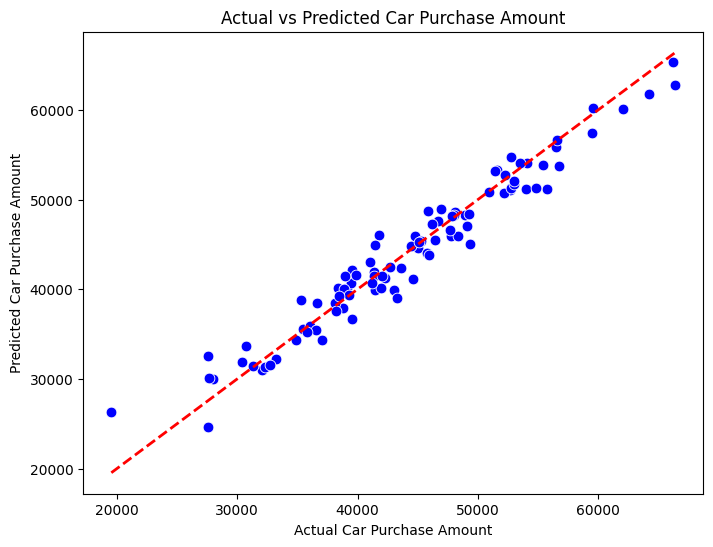

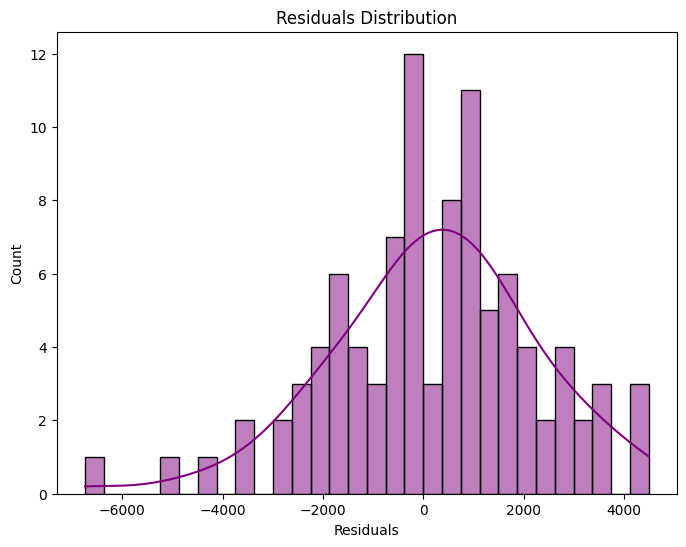

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization of Results

# Scatter plot: Actual vs Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Car Purchase Amount")
plt.ylabel("Predicted Car Purchase Amount")
plt.title("Actual vs Predicted Car Purchase Amount")
plt.show()

# Histogram / KDE plot: Residuals distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()